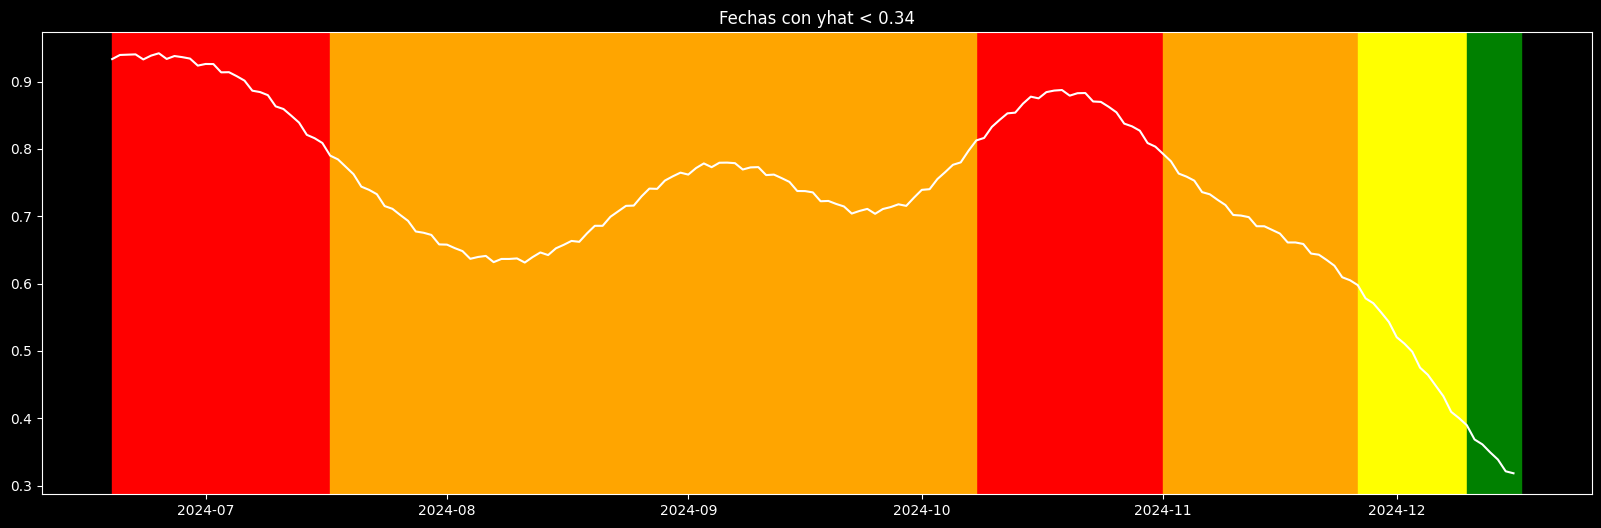

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Leer datos y configurar índice
df = pd.read_csv('forecast.csv')
df['ds'] = pd.to_datetime(df['ds'])  # Asegurarse de que 'ds' sea de tipo fecha
#df.set_index('ds', inplace=True)

ranges = [(0.8, 2, 'red', 1),
          (0.6, 0.8, 'orange', 1),
          (0.4, 0.6, 'yellow', 1),
          (0.2, 0.4, 'green', 1),
          (-1, 0.2, 'blue', 1)]  # Ordenados de mayor a menor para que el rojo esté primero

# Graficar la serie de tiempo
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(df['ds'], df['yhat'],  linestyle='-', color='w')

fechas_a_pintar = df[df['yhat'] < 0.34]['ds']

for ymin, ymax, color, alpha in ranges:
    fechas_a_pintar = df[(df['yhat'] >= ymin) & (df['yhat'] < ymax)]['ds']
    for date in fechas_a_pintar:
        ax.axvspan(date, date + pd.Timedelta(days=1), color=color, alpha=1)

plt.title('Fechas con yhat < 0.34')
plt.show()